In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Sample decision matrix (rows: models, columns: criteria)
data = {
    "Model": ["BERT", "SBERT", "RoBERTa", "DistilBERT", "MPNet", "MiniLM"],
    "Cosine Similarity Accuracy": [0.85, 0.89, 0.88, 0.83, 0.91, 0.87],  # Higher is better
    "Pearson Correlation": [0.82, 0.86, 0.84, 0.80, 0.89, 0.85],  # Higher is better
    "Spearman Correlation": [0.80, 0.85, 0.83, 0.78, 0.88, 0.84],  # Higher is better
    "Inference Time (ms)": [50, 40, 45, 30, 35, 25],  # Lower is better
    "Model Size (MB)": [420, 300, 350, 250, 280, 200]  # Lower is better
}

# Convert data into DataFrame
df = pd.DataFrame(data)

# Normalize the decision matrix
matrix = df.iloc[:, 1:].values
norm_matrix = matrix / np.sqrt((matrix ** 2).sum(axis=0))

# Define weights (importance of each criterion)
weights = np.array([0.25, 0.20, 0.20, 0.15, 0.20])

# Weighted normalized decision matrix
weighted_matrix = norm_matrix * weights

# Identify ideal best (A+) and worst (A-) solutions
ideal_best = np.max(weighted_matrix, axis=0)
ideal_worst = np.min(weighted_matrix, axis=0)

# Calculate Euclidean distances to ideal best and worst
dist_best = np.sqrt(((weighted_matrix - ideal_best) ** 2).sum(axis=1))
dist_worst = np.sqrt(((weighted_matrix - ideal_worst) ** 2).sum(axis=1))

# Compute TOPSIS scores
topsis_scores = dist_worst / (dist_best + dist_worst)

df["TOPSIS Score"] = topsis_scores

# Rank models based on TOPSIS score
df["Rank"] = df["TOPSIS Score"].rank(ascending=False)

In [2]:
# Save the ranked results to a CSV file
df_sorted = df.sort_values(by="TOPSIS Score", ascending=False)
df_sorted.to_csv("topsis_results.csv", index=False)
print("Results saved to topsis_results.csv")


Results saved to topsis_results.csv


C:\Users\Dell\AppData\Local\Temp\ipykernel_4640\1466225366.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=df_sorted["Model"], y=df_sorted["TOPSIS Score"], palette="coolwarm")


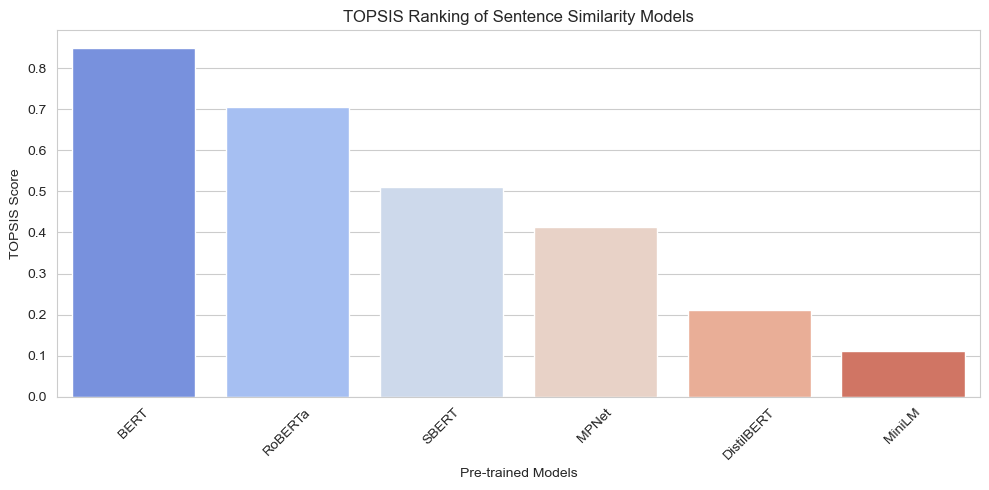

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set style
sns.set_style("whitegrid")

# Bar Plot of TOPSIS Scores
plt.figure(figsize=(10, 5))
sns.barplot(x=df_sorted["Model"], y=df_sorted["TOPSIS Score"], palette="coolwarm")
plt.xlabel("Pre-trained Models")
plt.ylabel("TOPSIS Score")
plt.title("TOPSIS Ranking of Sentence Similarity Models")
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig("topsis_scores.png")
plt.show()
